In [1]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import pcprutils as ut
from statannot import add_stat_annotation
import numpy as np
import cptac.pancan as pc

In [2]:
luad = pc.PancanLuad()

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rna_combined = rna_tumor.append(rna_normal)


In [3]:
df = ut.get_prot_trans_df(luad)
df.Tissue = [tissue.title() for tissue in df.Tissue]
df = df.rename(columns = {'Proteomics': 'Protein Abundance', 'Transcriptomics': 'RNA Abundance'})

In [14]:
genes = ['GSK3B', 'EGFL7', 'SDC4']

In [15]:
diff_prot = pd.read_csv('data/Proteomics_differential_expression_df.csv')
diff_prot = diff_prot[diff_prot.Gene.isin(genes)]
diff_prot = diff_prot[diff_prot.Cancer == 'LUAD']
diff_trans = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
diff_trans = diff_trans[diff_trans.Gene.isin(genes)]
diff_trans = diff_trans[diff_trans.Cancer == 'LUAD']

In [19]:
a = 'Gene: GSK3B\n' + 'Cancer: LUAD\n'   + r'$\Delta$' + ' Correlation:' + u'\u2718' + '\n' + 'Diff. Expression: ' + u'\u2714'
b = 'Gene: EGFL7\n' + 'Cancer: LUAD\n' + r'$\Delta$' + ' Correlation:' + u'\u2714' + '\n' + 'Diff. Expression:' + u'\u2714'
c = 'Gene: SDC4\n' + 'Cancer: LUAD\n'  + r'$\Delta$' + ' Correlation:' + u'\u2714' + '\n' + 'Diff. Expression:' + u'\u2718'
notes = [a,b,c]

In [20]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

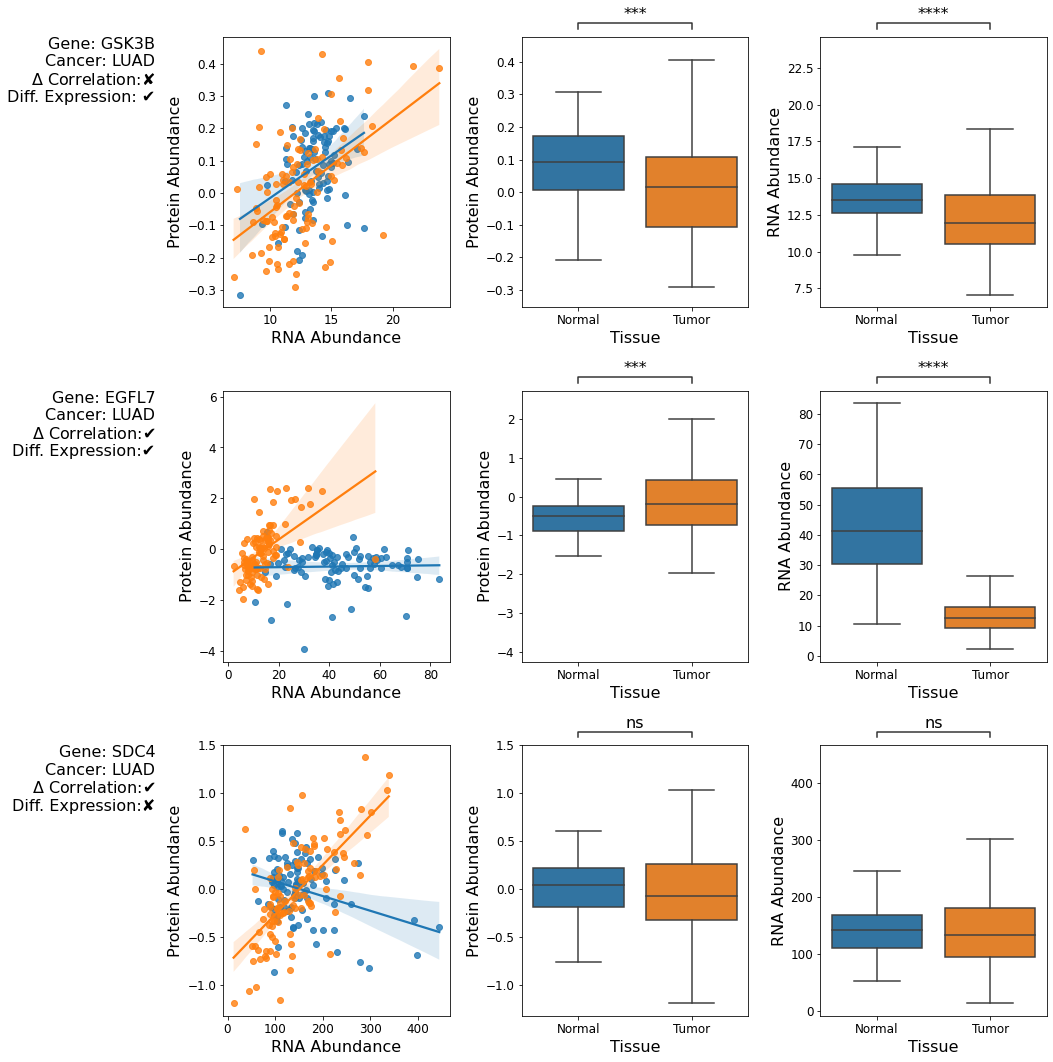

In [21]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
plt.subplots_adjust(hspace = 0.3)
i = 0
for gene, s in zip(genes, notes):
    gene_df = df[df.Gene == gene]
    trans_pval = diff_trans[diff_trans.Gene == gene].FDR
    trans_pval = np.array(trans_pval)
    prot_pval = diff_prot[diff_prot.Gene == gene].FDR
    prot_pval = np.array(prot_pval)
    plt.sca(ax[i][0])
    plt.gca().text(-0.3, 1, s, transform = plt.gca().transAxes, 
                 fontsize = 16, va = 'top', ha = 'right')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Normal'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Tumor'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    plt.sca(ax[i][1])
    g = sns.boxplot(data = gene_df, x = 'Tissue', y = 'Protein Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g, data=df, x='Tissue', y='Protein Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = prot_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    plt.sca(ax[i][2])
    g2 = sns.boxplot(data = gene_df, x = 'Tissue', y = 'RNA Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g2, data=df, x='Tissue', y='RNA Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = trans_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    i += 1

fig.tight_layout()
# plt.savefig('Figures/Figure 2) Correlation vs Differential Expression.png')

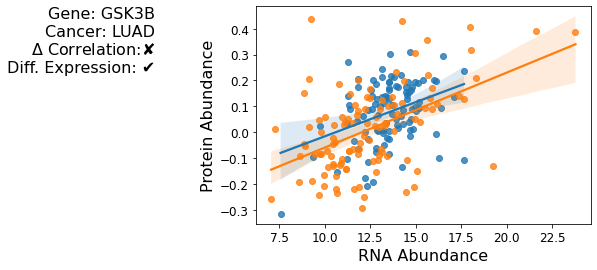

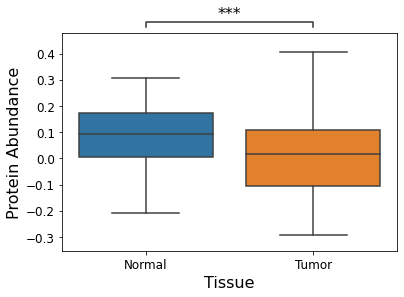

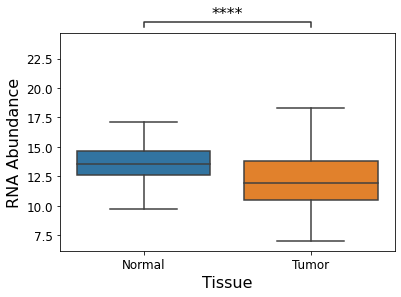

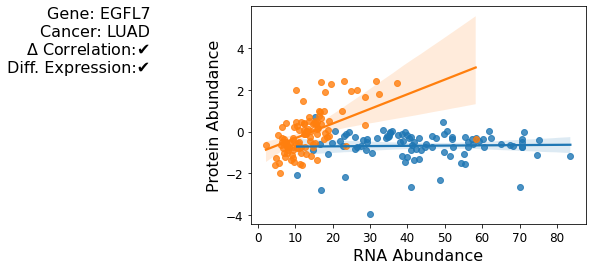

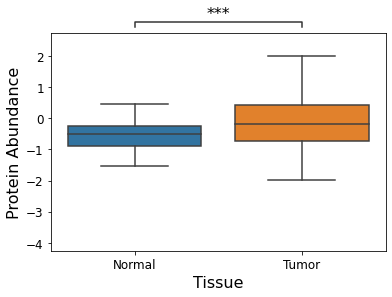

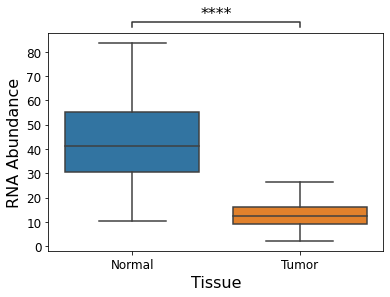

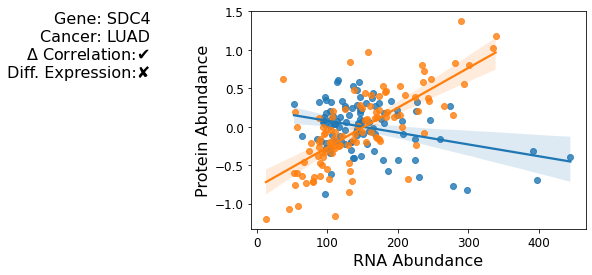

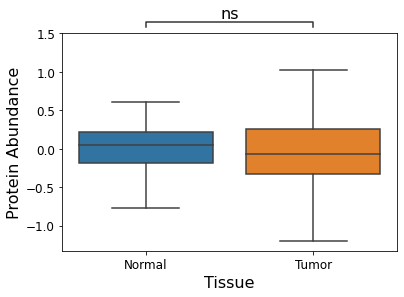

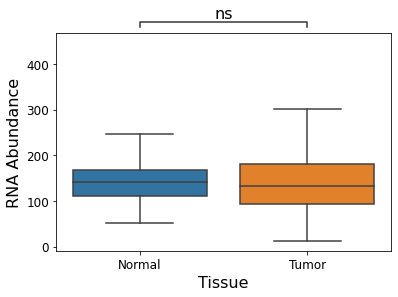

In [29]:
for gene, s in zip(genes, notes):
    gene_df = df[df.Gene == gene]
    trans_pval = diff_trans[diff_trans.Gene == gene].FDR
    trans_pval = np.array(trans_pval)
    prot_pval = diff_prot[diff_prot.Gene == gene].FDR
    prot_pval = np.array(prot_pval)
    plt.gca().text(-0.3, 1, s, transform = plt.gca().transAxes, 
                 fontsize = 16, va = 'top', ha = 'right')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Normal'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Tumor'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    plt.savefig('Figures/Figure_2_regplot_'+gene+'.png')
    plt.show()
    g = sns.boxplot(data = gene_df, x = 'Tissue', y = 'Protein Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g, data=df, x='Tissue', y='Protein Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = prot_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    plt.savefig('Figures/Figure_2_box_protein_'+gene+'.png')
    plt.show()
    g2 = sns.boxplot(data = gene_df, x = 'Tissue', y = 'RNA Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g2, data=df, x='Tissue', y='RNA Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = trans_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    plt.savefig('Figures/Figure_2_box_RNA_'+gene+'.png')
    plt.show()
    